<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#pairplot" data-toc-modified-id="pairplot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>pairplot</a></span></li><li><span><a href="#total_day_minutes" data-toc-modified-id="total_day_minutes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>total_day_minutes</a></span></li><li><span><a href="#number_customer_service_calls" data-toc-modified-id="number_customer_service_calls-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>number_customer_service_calls</a></span></li><li><span><a href="#meses-de-clientes" data-toc-modified-id="meses-de-clientes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>meses de clientes</a></span></li><li><span><a href="#minutos-por-llamada" data-toc-modified-id="minutos-por-llamada-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>minutos por llamada</a></span></li><li><span><a href="#estados" data-toc-modified-id="estados-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>estados</a></span><ul class="toc-item"><li><span><a href="#target-encoding-with-states" data-toc-modified-id="target-encoding-with-states-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>target encoding with states</a></span></li><li><span><a href="#money_minute_day" data-toc-modified-id="money_minute_day-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>money_minute_day</a></span></li><li><span><a href="#la-duracion-es-mayour-o-menor-en-estados" data-toc-modified-id="la-duracion-es-mayour-o-menor-en-estados-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>la duracion es mayour o menor en estados</a></span></li><li><span><a href="#mean-service-calls-per-state-[YES]" data-toc-modified-id="mean-service-calls-per-state-[YES]-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>mean service calls per state [YES]</a></span></li><li><span><a href="#minutos-internacioneales-por-estado" data-toc-modified-id="minutos-internacioneales-por-estado-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>minutos internacioneales por estado</a></span></li></ul></li><li><span><a href="#number-of-calls" data-toc-modified-id="number-of-calls-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>number of calls</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#Automcompletar rápido
%config IPCompleter.greedy=True

C:\Users\acrespod\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ruta_proyecto = '../..'
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

In [57]:
df = pd.concat([cat,num],axis=1)

In [58]:
df['target'] = df['churn'].map({'yes':1,'no':0})

# pairplot

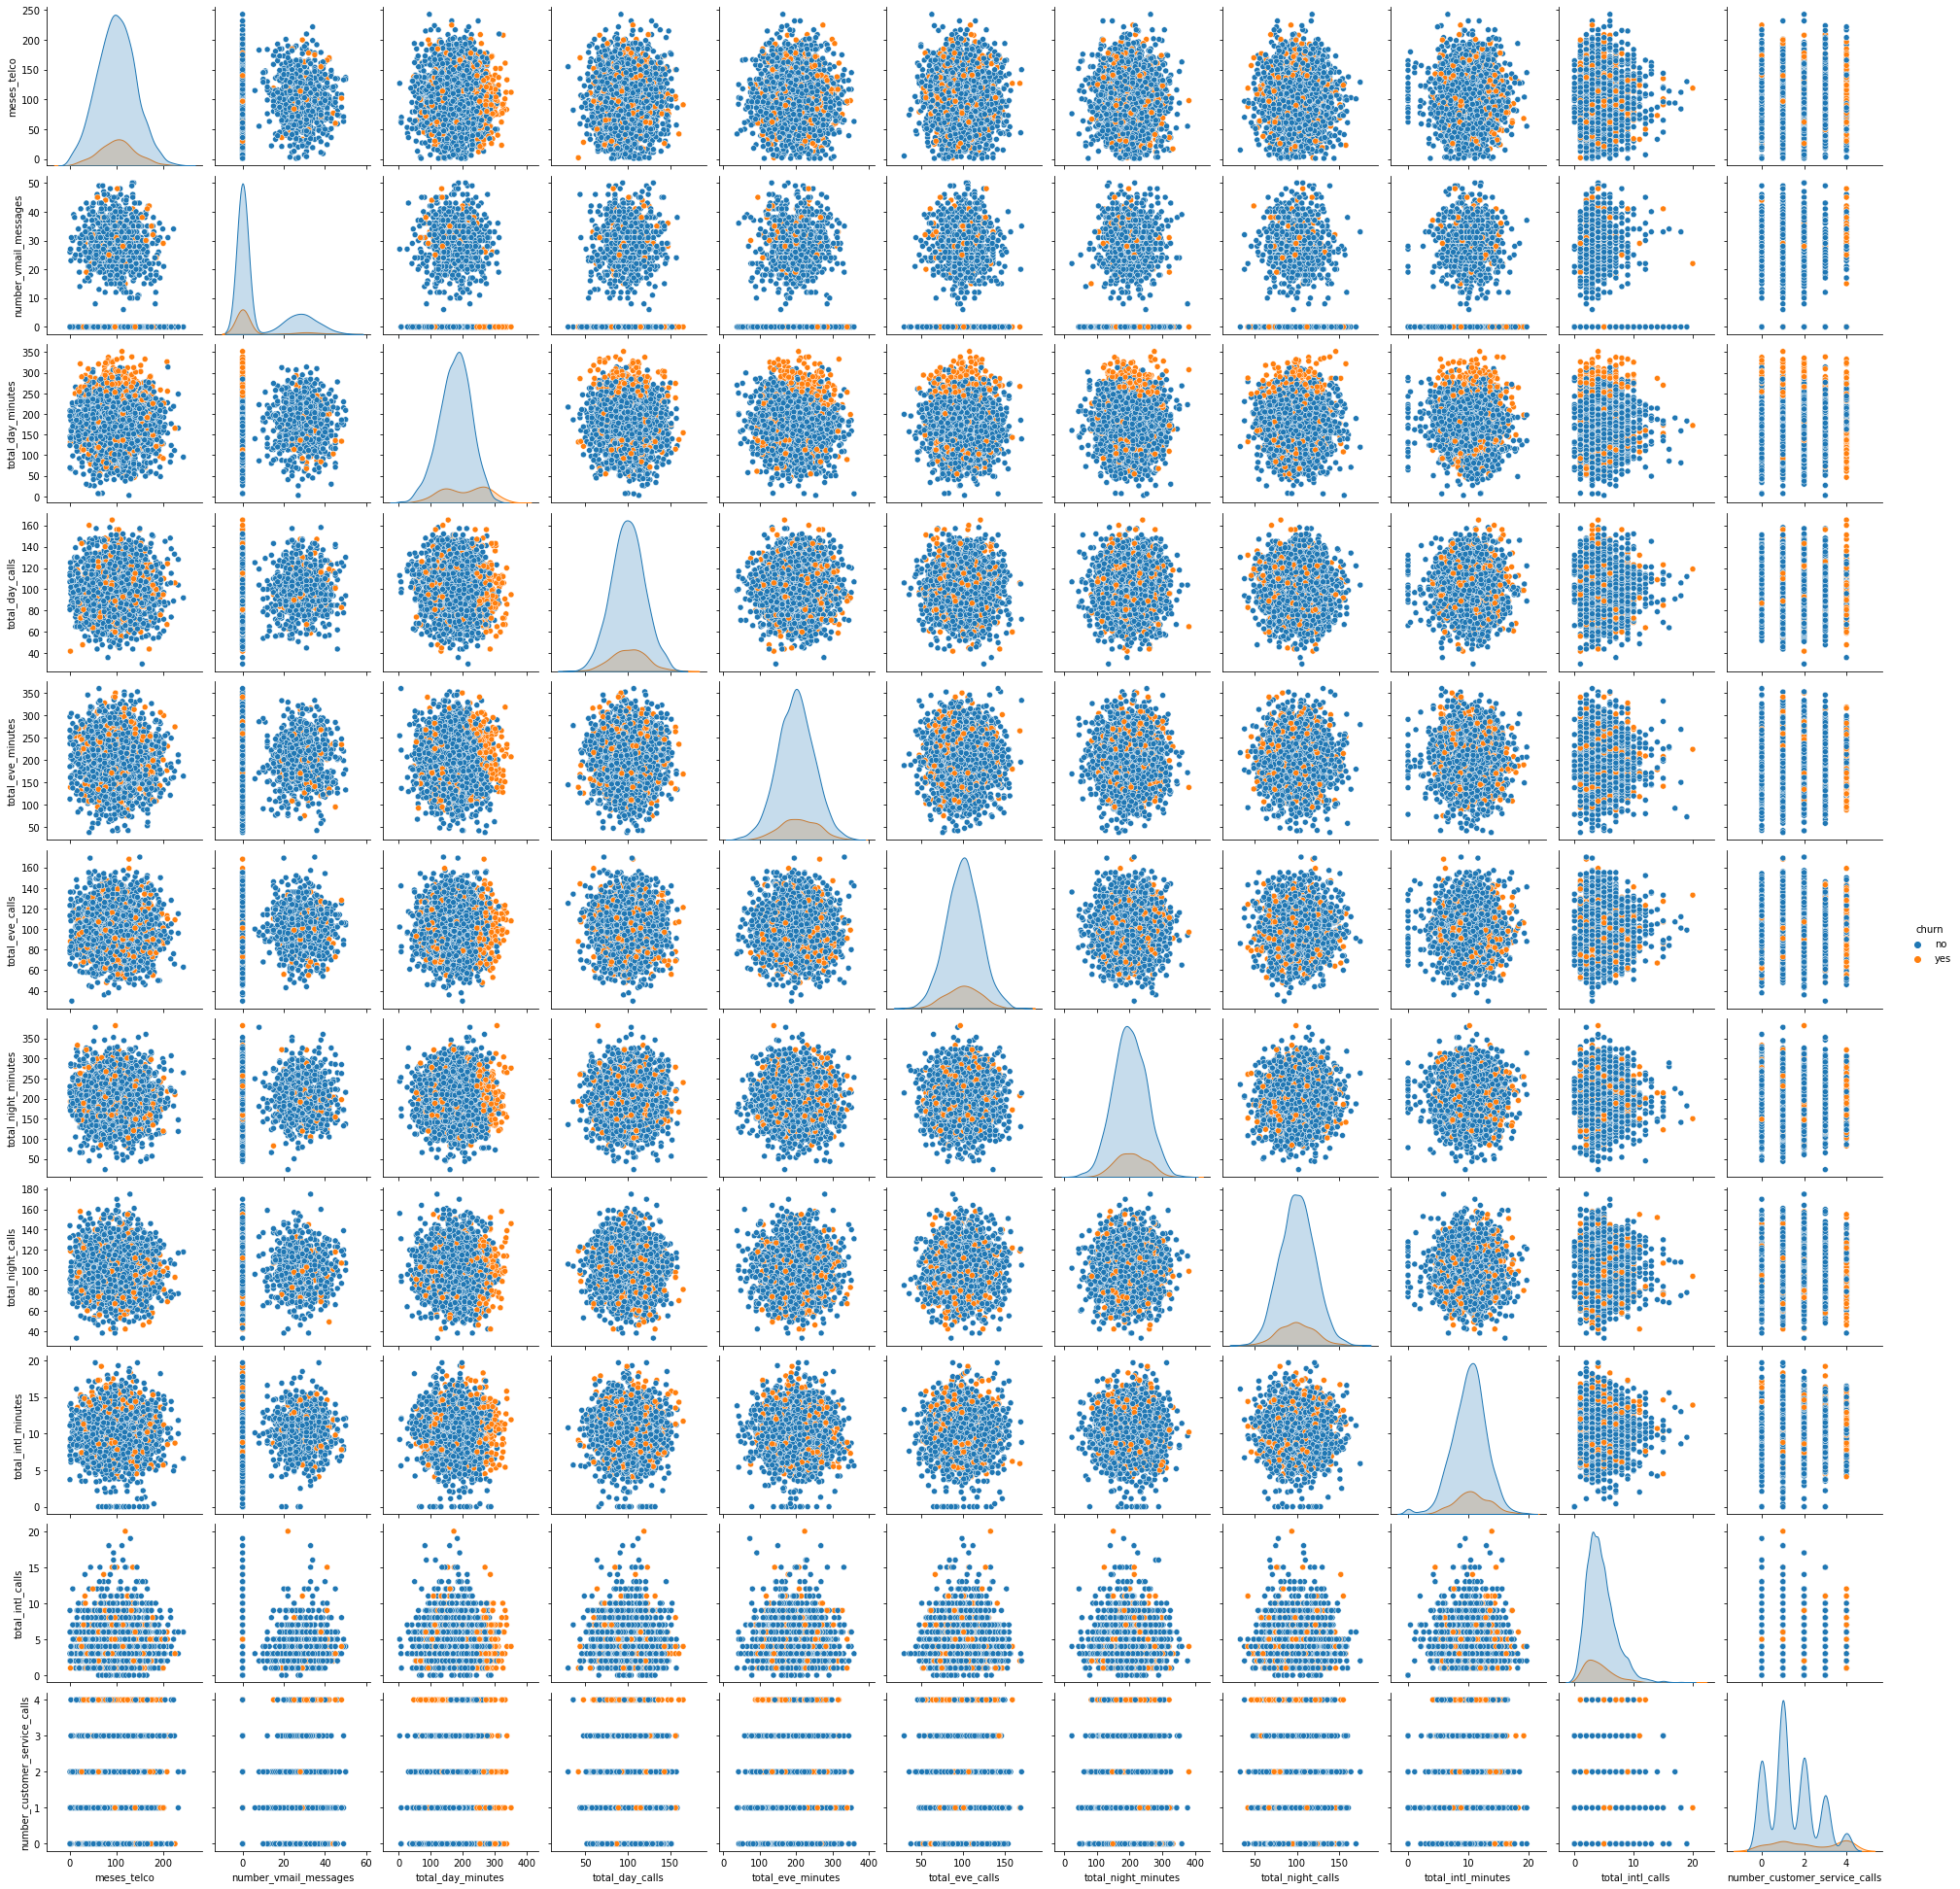

In [16]:
sns.pairplot(data=df, hue='churn')

total day minutos

In [17]:
df.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn',
       'meses_telco', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')

# total_day_minutes
**INSIGHT 1** :He dividido la variable en deciles. He visto el numero de personas que deja la compañia es muy alto en el decil superior (de 250 minutos a 350 minutos)


In [6]:
aux = df[['total_day_minutes','churn']].copy()
aux.churn.unique()

array(['no', 'yes'], dtype=object)

In [7]:
aux.shape[0]/10

297.4

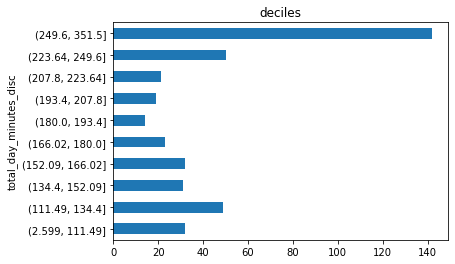

In [8]:
cortes = np.arange(0,1.1,0.1)
aux['total_day_minutes_disc'] = pd.qcut(aux['total_day_minutes'],cortes)
aux.query('churn == "yes"')\
    .groupby(['total_day_minutes_disc'])['churn'].count()\
    .plot(kind='barh', title= 'deciles')
plt.show()

In [33]:
aux.total_day_minutes.describe()

count   2974.00
mean     179.69
std       53.87
min        2.60
25%      143.30
50%      180.00
75%      215.88
max      351.50
Name: total_day_minutes, dtype: float64

In [13]:
#new feature
aux['op'] = np.where(aux['total_day_minutes']>250,1,0)
aux.corr()

,total_day_minutes,op
total_day_minutes,1.00,0.59
op,0.59,1.00


# number_customer_service_calls
**INSIGHT 2** : Si el numero de servicio de llamadas es igual a 4 se dispara dejar la compañia

In [41]:
pd.crosstab(df.number_customer_service_calls,df.churn, normalize = 'index', margins = True, margins_name= 'Total')

churn,no,yes
number_customer_service_calls,,
0,0.90,0.10
1,0.90,0.10
2,0.89,0.11
3,0.90,0.10
4,0.47,0.53
Total,0.86,0.14


# meses de clientes
He comprobado si hay patrones por año, semestre o cuatrimestre.  
No veo ningún patrón

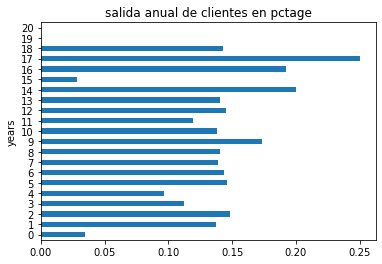

In [114]:
from math import floor
df['years'] = (df['meses_telco']/12).transform(lambda x: floor(x))

aux = df.groupby(['years'])['target']\
    .agg(['sum','count'])\
    .rename(columns={'sum':'suma','count':'conteo'})

aux = aux.assign(pctge_salidas=aux['suma']/aux['conteo'])
aux['pctge_salidas'].plot(kind='barh',title="salida anual de clientes en pctage")
plt.show()

<AxesSubplot:title={'center':'salida de clientes por semetres en pctage'}, ylabel='semetres'>

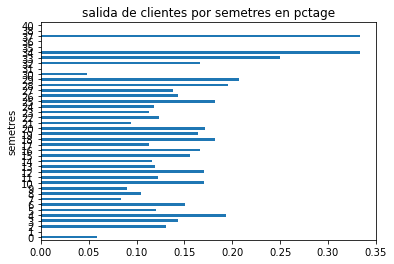

In [116]:
df['semetres'] = (df['meses_telco']/6).transform(lambda x: floor(x))

aux = df.groupby(['semetres'])['target']\
    .agg(['sum','count'])\
    .rename(columns={'sum':'suma','count':'conteo'})

aux = aux.assign(pctge_salidas=aux['suma']/aux['conteo'])
aux['pctge_salidas'].plot(kind='barh',title="salida de clientes por semetres en pctage")

# minutos por llamada
- mas minutos por llamada mas probabilidad de salida de la empresa

<AxesSubplot:xlabel='minutos_llamada', ylabel='Count'>

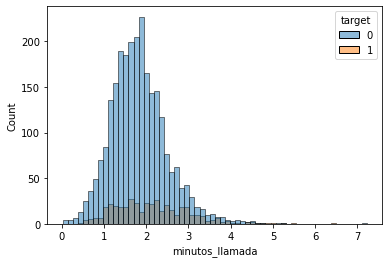

In [14]:
df = df.assign(minutos_llamada = df['total_day_minutes']/df['total_day_calls'] )
sns.histplot(data=df, x='minutos_llamada', hue='target')

In [22]:
cortes = [0,1,2,3,4,8]
df['minutos_llamada_disc'] = pd.cut(df['minutos_llamada'],cortes)
df['minutos_llamada_disc_code'] = df['minutos_llamada_disc'].cat.codes

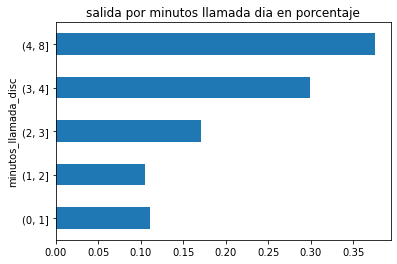

In [130]:
aux = df.groupby(['minutos_llamada_disc'])['target']\
    .agg(['sum','count'])\
    .rename(columns={'sum':'suma','count':'conteo'})
aux = aux.assign(cociente= aux['suma']/aux['conteo'])
aux['cociente'].plot.barh(title='salida por minutos llamada dia en porcentaje')
plt.show()

In [24]:
df.corr()['minutos_llamada_disc_code']

meses_telco                     -0.03
number_vmail_messages           -0.01
total_day_minutes                0.73
total_day_calls                 -0.53
total_eve_minutes               -0.02
total_eve_calls                  0.02
total_night_minutes              0.01
total_night_calls               -0.02
total_intl_minutes              -0.03
total_intl_calls                 0.01
number_customer_service_calls    0.01
target                           0.14
minutos_llamada                  0.92
minutos_llamada_disc_code        1.00
Name: minutos_llamada_disc_code, dtype: float64

# estados
- **INSIGHT 3**: la probabilidad de salida de un cliente de la compañia varia mucho entre estado

## target encoding with states

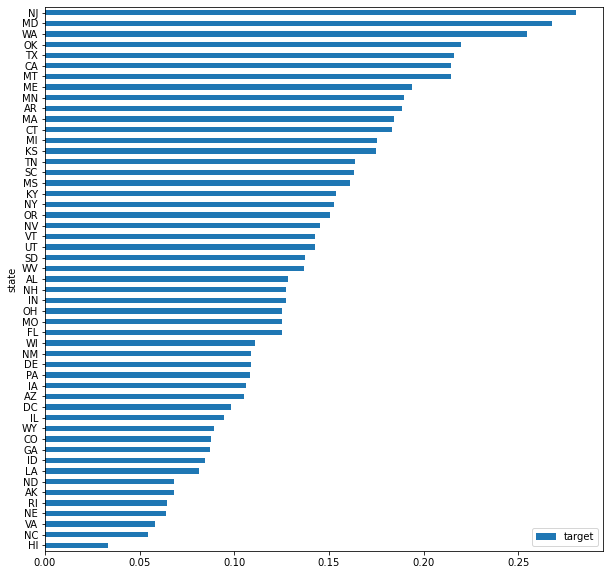

In [129]:
aux = df.groupby(['state'])[['target']].agg('mean')
aux.sort_values('target').plot.barh(figsize=(10,10));

puedes discretizarlo y poner una variable ordinal por estado

## money_minute_day
money_minute_day es igual para todos los estados

In [74]:
df['money_minute_day'] = df['total_day_charge']/df['total_day_minutes']
df['money_minute_day']

count   2974.00
mean       0.17
std        0.00
min        0.17
25%        0.17
50%        0.17
75%        0.17
max        0.17
Name: money_minute_day, dtype: float64

In [103]:
df['money_minute_intl'] = df['total_intl_charge']/df['total_intl_charge']
df['money_minute_intl'].describe()

count   2956.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: money_minute_intl, dtype: float64

## la duracion es mayour o menor en estados 
- Si comparamos la duracion media, maxima y minima entre estados podemos ver que la maxima y media no son muy diferentes entre si. En cambio, el minimo entre estado varía bastante. Por eso vamos a hacer una nueva variable basada en el percenil 10 en cada estado.

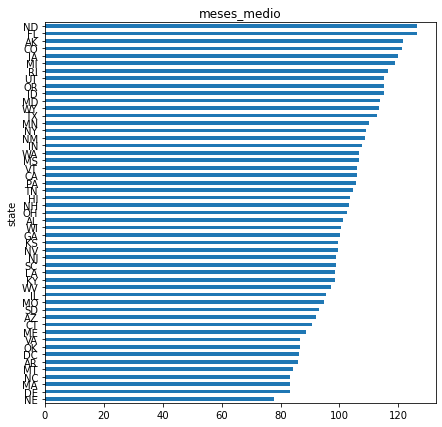

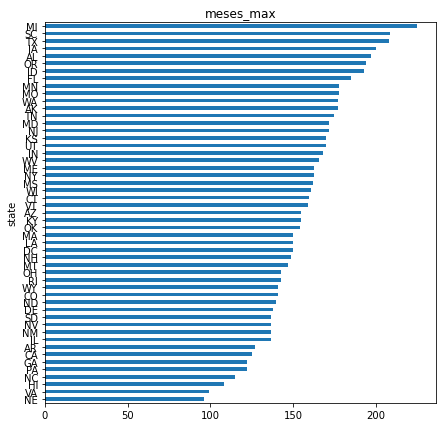

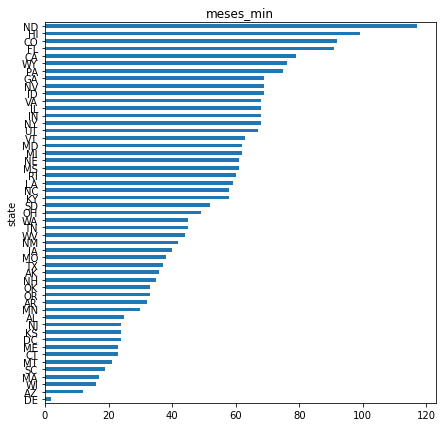

In [171]:
# usando filtros
aux = df.query('target==1').groupby(['state'])[['meses_telco']].agg(['mean','max','min'])
aux.columns = ['meses_medio','meses_max','meses_min']

for v in ['meses_medio','meses_max','meses_min']:
    aux[v].sort_values().plot.barh(figsize=(7,7), title=v)
    plt.show()

In [170]:
#new feature
aux = df.query('target==1').groupby(['state'])[['meses_telco']].agg(lambda x:x.quantile(q=0.1))
valor = aux.to_dict()['meses_telco']
df['meses_state'] = df['state'].map(valor)

C:\Users\acrespod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='bbb'>

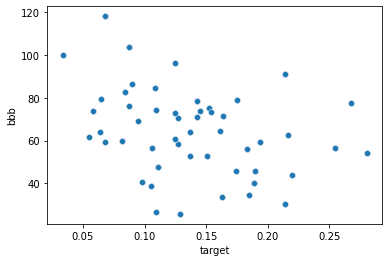

In [120]:
valores = df.query('target==1').groupby(['state'])[['meses_telco']].agg(lambda x:x.quantile(q=0.1))
df2 = df.copy()
# valores.to_dict()['meses_telco']
df2['bbb'] = df2['state'].map(valores.to_dict()['meses_telco'])
np.corrcoef(aux1,df2['bbb'])
sns.scatterplot(aux1,df2['bbb'])

## mean service calls per state [YES]

,number_customer_service_calls,target
number_customer_service_calls,1.00,0.27
target,0.27,1.00


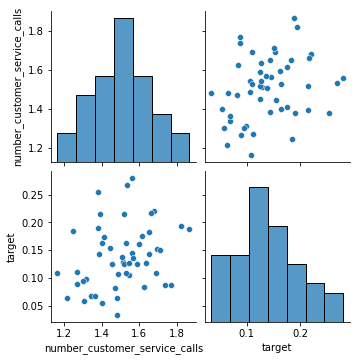

In [113]:
aux = df.groupby(['state'])[['number_customer_service_calls','target']].agg(['mean'])
# aux
# sns.pairplot(data=aux)
aux.columns = ['number_customer_service_calls','target']
sns.pairplot(data=aux)
# for v in ['meses_medio','meses_max','meses_min']:
#     aux[v].sort_values().plot.barh(figsize=(7,7), title=v)
#     plt.show()
aux.corr()

## minutos internacioneales por estado

<AxesSubplot:ylabel='state'>

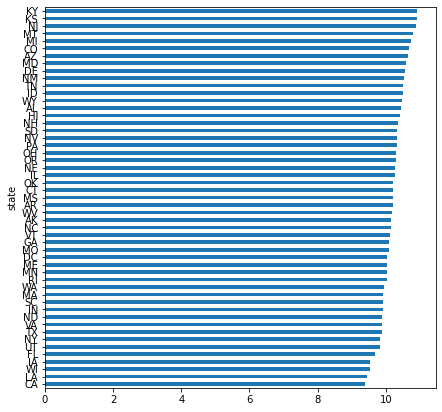

In [135]:
df.groupby(['state'])['total_intl_minutes'].mean().sort_values().plot.barh(figsize=(7,7))

# number of calls
Que una persona tenga mas tendencia lllamar en una hora del dia no tiene efecto en si va a dejar la compañia

In [140]:
l = df.columns[df.columns.str.contains('call')].tolist()[:-1]
l

['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls']

In [142]:
df[l].describe().T

,count,mean,std,min,25%,50%,75%,max
total_day_calls,2974.00,100.18,19.60,30.00,87.00,100.00,113.00,165.00
total_eve_calls,2974.00,100.16,19.97,30.00,87.00,100.00,114.00,170.00
total_night_calls,2974.00,100.24,20.30,33.00,86.00,100.00,114.00,175.00
total_intl_calls,2974.00,4.40,2.45,0.00,3.00,4.00,6.00,20.00


In [159]:
def mas(x):
    i= np.argmax(x)
    return x.index[i]
df['call_max'] = df[l].apply(lambda x: mas(x),axis=1)
df.groupby(['call_max'])['target'].mean()

call_max
total_day_calls     0.15
total_eve_calls     0.14
total_night_calls   0.13
Name: target, dtype: float64

In [163]:
l = df.columns[df.columns.str.contains('minut')].tolist()[:-2]
l

['total_day_minutes',
 'total_eve_minutes',
 'total_night_minutes',
 'total_intl_minutes']

In [164]:
def mas(x):
    i= np.argmax(x)
    return x.index[i]
df['call_max'] = df[l].apply(lambda x: mas(x),axis=1)
df.groupby(['call_max'])['target'].mean()

call_max
total_day_minutes     0.22
total_eve_minutes     0.12
total_night_minutes   0.11
Name: target, dtype: float64

'total_day_calls'